#IMPORT LIBRARY

In [147]:
## import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#READ DATA

In [148]:
df = pd.read_excel('F:\KEDE\Documents\Kuliah\SKRIPSI\projek\Dataset Magang - Data Triage dan ASMED IGD.xlsx')
df.head()

,ID KUNJUNGAN,ID TRIAGE,WAKTU TRIAGE,JAM TRIAGE,HARI TRIAGE,WAKTU REGISTRASI,JAM REGISTRASI,HARI REGISTRASI,KESIMPULAN EMERGENSI,TANGGAL LAHIR,...,PROSEDUR UTAMA,IGD MEDIS AKHIR,TANGGAL PULANG,SELISIH TRIAGE - REGISTRASI (2),SELISIH REGISTRASI - IGD AWAL (2),SELISIH IGD AWAL - IGD AKHIR (2),SELISIH TRIAGE - IGD AWAL (2),SELISIH TRIAGE - IGD AKHIR,TINDAKAN IGD,row_num
0,553320,58199,2023-12-31 20:15:00+00:00,20.0,Sunday,2024-01-01 00:00:00+00:00,0.0,Monday,Kategori 3 - Urgent,2006-07-12 17:00:00+00:00,...,NaN,2024-01-01 04:40:55+00:00,2024-01-01 02:47:00+00:00,225.0,22.0,259.0,247.0,506.0,LAINNYA,1
1,553321,58200,2023-12-31 23:58:00+00:00,23.0,Sunday,2024-01-01 00:06:00+00:00,0.0,Monday,Kategori 3 - Urgent,2003-09-19 00:00:00+00:00,...,99.29 - Injection or infusion of other therape...,2024-01-01 01:08:45+00:00,2024-01-01 01:18:00+00:00,8.0,21.0,41.0,29.0,71.0,MEDICAL,1
2,553322,58201,2023-12-31 23:58:00+00:00,23.0,Sunday,2024-01-01 00:21:00+00:00,0.0,Monday,Kategori 3 - Urgent,1973-05-31 00:00:00+00:00,...,99.29 - Injection or infusion of other therape...,2024-01-01 01:12:33+00:00,2024-01-01 01:15:00+00:00,23.0,24.0,27.0,47.0,75.0,MEDICAL,1
3,553323,58202,2024-01-01 00:42:00+00:00,0.0,Monday,2024-01-01 00:50:00+00:00,0.0,Monday,Kategori 4 - Semi-Urgent,2020-09-07 00:00:00+00:00,...,99.29 - Injection or infusion of other therape...,2024-01-01 01:44:52+00:00,2024-01-01 01:55:00+00:00,8.0,2.0,53.0,10.0,63.0,MEDICAL,1
4,553326,58203,2024-01-01 00:55:00+00:00,0.0,Monday,2024-01-01 01:10:00+00:00,1.0,Monday,Kategori 3 - Urgent,1965-05-15 00:00:00+00:00,...,99.2 - Injection or infusion of other therapeu...,2024-01-01 02:26:10+00:00,2024-01-01 02:20:00+00:00,15.0,35.0,41.0,50.0,91.0,MEDICAL,1


#PREPOCESSING

In [149]:
columns_to_drop = ['ID KUNJUNGAN', 'keluhan_utama', 'riwayat_kesehatan_saat_ini', 'row_num', 'ID TRIAGE', 'pemeriksaan_fisik', 'HARI TRIAGE', 'JAM REGISTRASI', 'HARI REGISTRASI', 'DPJP AWAL', 'DPJP AKHIR', 'ASURANSI', 'IGD MEDIS AWAL', 'diagnosa', 'DIAGNOSA UTAMA', 'SELISIH TRIAGE - REGISTRASI (2)', 'SELISIH REGISTRASI - IGD AWAL (2)', 'SELISIH IGD AWAL - IGD AKHIR (2)', 'SELISIH TRIAGE - IGD AWAL (2)', 'SELISIH TRIAGE - IGD AKHIR', 'TINDAKAN IGD', 'KETERANGAN ASESMEN', 'DIAGNOSA SEKUNDER', 'PROSEDUR UTAMA', 'IGD MEDIS AKHIR', 'TANGGAL PULANG']

df = df.drop(columns=columns_to_drop)

df.head(2500)

,WAKTU TRIAGE,JAM TRIAGE,WAKTU REGISTRASI,KESIMPULAN EMERGENSI,TANGGAL LAHIR,umur,KATEGORI UMUR,JENIS KELAMIN,STATUS JKN,Tindak Lanjut Akhir Igd,ttv,gcs
0,2023-12-31 20:15:00+00:00,20.0,2024-01-01 00:00:00+00:00,Kategori 3 - Urgent,2006-07-12 17:00:00+00:00,19 th 6 bl 30 hr,15 - 25 Tahun,PEREMPUAN,NON JKN,Rawat Inap,sistolik : 113 \ndiastolik : 83 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
1,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:06:00+00:00,Kategori 3 - Urgent,2003-09-19 00:00:00+00:00,20 th 3 bl 13 hr,15 - 25 Tahun,PEREMPUAN,JKN,Pengobatan Selesai,sistolik : 125 \ndiastolik : 70 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
2,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:21:00+00:00,Kategori 3 - Urgent,1973-05-31 00:00:00+00:00,50 th 7 bl 1 hr,45 - 64 Tahun,Laki-Laki,JKN,Pengobatan Selesai,sistolik : 140 \ndiastolik : 85 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
3,2024-01-01 00:42:00+00:00,0.0,2024-01-01 00:50:00+00:00,Kategori 4 - Semi-Urgent,2020-09-07 00:00:00+00:00,3 th 3 bl 25 hr,1 - 4 Tahun,PEREMPUAN,JKN,Pengobatan Selesai,sistolik : - \ndiastolik : - \npernapasan : 24...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...
4,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:10:00+00:00,Kategori 3 - Urgent,1965-05-15 00:00:00+00:00,58 th 7 bl 17 hr,45 - 64 Tahun,Laki-Laki,JKN,Pengobatan Selesai,sistolik : 81 \ndiastolik : 60 \npernapasan : ...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2024-01-30 21:45:00+00:00,21.0,2024-01-30 22:28:00+00:00,Kategori 3 - Urgent,1989-11-26 00:00:00+00:00,34 th 2 bl 4 hr,26 - 44 Tahun,PEREMPUAN,JKN,Pengobatan Selesai,sistolik : 154 \ndiastolik : 90 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
2496,2024-01-30 21:45:00+00:00,21.0,2024-01-30 22:34:00+00:00,Kategori 4 - Semi-Urgent,2012-12-29 00:00:00+00:00,11 th 1 bl 1 hr,5 - 14 Tahun,PEREMPUAN,JKN,Rawat Inap,sistolik : - \ndiastolik : - \npernapasan : 25...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
2497,2024-01-30 21:45:00+00:00,21.0,2024-01-30 22:44:00+00:00,Kategori 4 - Semi-Urgent,2021-09-06 00:00:00+00:00,2 th 4 bl 24 hr,1 - 4 Tahun,PEREMPUAN,JKN,Pengobatan Selesai,sistolik : 00 \ndiastolik : 00 \npernapasan : ...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...
2498,2024-01-30 21:45:00+00:00,21.0,2024-01-30 22:48:00+00:00,Kategori 3 - Urgent,1967-02-09 00:00:00+00:00,56 th 11 bl 21 hr,45 - 64 Tahun,Laki-Laki,JKN,Rawat Inap,sistolik : 120 \ndiastolik : 97 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...


In [150]:
df.shape

(26705, 12)

In [151]:
df.isnull().sum()

WAKTU TRIAGE                 3
JAM TRIAGE                   3
WAKTU REGISTRASI             0
KESIMPULAN EMERGENSI       175
TANGGAL LAHIR                0
umur                         0
KATEGORI UMUR                0
JENIS KELAMIN                0
STATUS JKN                   0
Tindak Lanjut Akhir Igd      0
ttv                          0
gcs                          0
dtype: int64

In [152]:
df.shape

(26705, 12)

In [153]:
#df['KODE DIAGNOSA'] = df['DIAGNOSA UTAMA'].str.extract(r'([A-Z])\d+')

In [154]:
unique_hari_triage = df['Tindak Lanjut Akhir Igd'].unique()
print(unique_hari_triage)

['Rawat Inap' 'Pengobatan Selesai' 'APS' 'Rujuk Eksternal' 'Meninggal'
 'Lanjut Observasi']


In [155]:
unique_hari_triagea= df['KATEGORI UMUR'].unique()
print(unique_hari_triagea)

['15 - 25 Tahun' '45 - 64 Tahun' '1 - 4 Tahun' '26 - 44 Tahun'
 '>= 65 Tahun' '5 - 14 Tahun' '29 Hari - < 1 Tahun' '0 - 6 Hari'
 '7 - 28 Hari']


In [156]:
unique_hari_triageb= df['STATUS JKN'].unique()
print(unique_hari_triageb)

['NON JKN' 'JKN']


In [157]:
unique_hari_triageD= df['KESIMPULAN EMERGENSI'].unique()
print(unique_hari_triageD)

['Kategori 3 - Urgent' 'Kategori 4 - Semi-Urgent' 'Kategori 2 - Emergensi'
 'Kategori 1 - Resusitasi' nan 'Kategori 5 - Non-Urgent']


In [158]:
unique_hari_triagee= df['JAM TRIAGE'].unique()
print(unique_hari_triagee)

[20. 23.  0.  6.  5.  7.  8. 11. 14. 15. 17. 19. 21. 22.  1. 10. 12. 13.
  3.  9. 18.  2.  4. 16. nan]


In [159]:
#unique_hari_triagef= df['KODE DIAGNOSA'].unique()
#print(unique_hari_triagef)

In [160]:
# Filter dataframe untuk mempertahankan baris yang tidak mengandung 'APS' atau 'Rujuk Eksternal'
df = df[~df['Tindak Lanjut Akhir Igd'].isin(['APS', 'Rujuk Eksternal', 'Lanjut Observasi'])]

# Reset index dataframe (opsional)
df = df.reset_index(drop=True)

In [161]:
df['JENIS KELAMIN'] = df['JENIS KELAMIN'].replace({
    'PEREMPUAN': 0,
    'Laki-Laki': 1,
})

df['KATEGORI UMUR'] = df['KATEGORI UMUR'].replace({
    '0 - 6 Hari': 0,
    '7 - 28 Hari': 1,
    '29 Hari - < 1 Tahun': 2,
    '1 - 4 Tahun': 3,
    '5 - 14 Tahun': 4,
    '15 - 25 Tahun': 5,
    '26 - 44 Tahun': 6,
    '45 - 64 Tahun': 7,
    '>= 65 Tahun': 8
})

df['Tindak Lanjut Akhir Igd'] = df['Tindak Lanjut Akhir Igd'].replace({
    'Pengobatan Selesai': 0,
    'Rawat Inap': 1,
    # 'APS': 0,
    # 'Rujuk Eksternal': 0,
    # 'Lanjut Observasi': 0,
    'Meninggal': 1,
})

df['STATUS JKN'] = df['STATUS JKN'].replace({
    'NON JKN': 0,
    'JKN': 1,
})

df['KESIMPULAN EMERGENSI'] = df['KESIMPULAN EMERGENSI'].replace({
    'Kategori 4 - Semi-Urgent': 3,
    'Kategori 3 - Urgent': 2,
    'Kategori 2 - Emergensi': 1,
    'Kategori 1 - Resusitasi': 0,
    'Kategori 5 - Non-Urgent': 4,
})

 # df.loc[df['JAM TRIAGE'] == 0.1, 'JAM TRIAGE'] = 3
  #df.loc[df['JAM TRIAGE'] == 1, 'JAM TRIAGE'] = 3
  #df.loc[df['JAM TRIAGE'] == 2, 'JAM TRIAGE'] = 3
 # df.loc[df['JAM TRIAGE'] == 3, 'JAM TRIAGE'] = 3
  #df.loc[df['JAM TRIAGE'] == 4, 'JAM TRIAGE'] = 0
  #df.loc[df['JAM TRIAGE'] == 5, 'JAM TRIAGE'] = 0
  #df.loc[df['JAM TRIAGE'] == 6, 'JAM TRIAGE'] = 0
  #df.loc[df['JAM TRIAGE'] == 7, 'JAM TRIAGE'] = 0
  #df.loc[df['JAM TRIAGE'] == 8, 'JAM TRIAGE'] = 0
  #df.loc[df['JAM TRIAGE'] == 9, 'JAM TRIAGE'] = 0
  #df.loc[df['JAM TRIAGE'] == 10.1, 'JAM TRIAGE'] = 0
  #df.loc[df['JAM TRIAGE'] == 11, 'JAM TRIAGE'] = 1
  #df.loc[df['JAM TRIAGE'] == 12, 'JAM TRIAGE'] = 1
  #df.loc[df['JAM TRIAGE'] == 13, 'JAM TRIAGE'] = 1
  #df.loc[df['JAM TRIAGE'] == 14, 'JAM TRIAGE'] = 1
  #df.loc[df['JAM TRIAGE'] == 15, 'JAM TRIAGE'] = 2
  #df.loc[df['JAM TRIAGE'] == 16, 'JAM TRIAGE'] = 2
  #df.loc[df['JAM TRIAGE'] == 17, 'JAM TRIAGE'] = 2
  #df.loc[df['JAM TRIAGE'] == 18, 'JAM TRIAGE'] = 2
  #df.loc[df['JAM TRIAGE'] == 19, 'JAM TRIAGE'] = 3
  #df.loc[df['JAM TRIAGE'] == 20.1, 'JAM TRIAGE'] = 3
  #df.loc[df['JAM TRIAGE'] == 21, 'JAM TRIAGE'] = 3
  #df.loc[df['JAM TRIAGE'] == 22, 'JAM TRIAGE'] = 3
  #df.loc[df['JAM TRIAGE'] == 23, 'JAM TRIAGE'] = 3

#df['KODE DIAGNOSA'] = df['KODE DIAGNOSA'].replace({
 #   'A': 0,
  #  'B': 0,
  #  'C': 1,
  #  'D': 2,
  #  'E': 3,
  #  'F': 4,
  #  'G': 5,
  #  'H': 6,
  #  'I': 7,
  #  'J': 8,
  #  'K': 9,
  #  'L': 10,
  #  'M': 11,
  #  'N': 12,
  #  'O': 13,
  #  'P': 14,
  #  'Q': 15,
  #  'R': 16,
  #  'S': 17,
  #  'T': 17,
  #  'Y': 18,
  #  'Z': 19,
#})

df.head(10)

,WAKTU TRIAGE,JAM TRIAGE,WAKTU REGISTRASI,KESIMPULAN EMERGENSI,TANGGAL LAHIR,umur,KATEGORI UMUR,JENIS KELAMIN,STATUS JKN,Tindak Lanjut Akhir Igd,ttv,gcs
0,2023-12-31 20:15:00+00:00,20.0,2024-01-01 00:00:00+00:00,2.0,2006-07-12 17:00:00+00:00,19 th 6 bl 30 hr,5,0,0,1,sistolik : 113 \ndiastolik : 83 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
1,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:06:00+00:00,2.0,2003-09-19 00:00:00+00:00,20 th 3 bl 13 hr,5,0,1,0,sistolik : 125 \ndiastolik : 70 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
2,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:21:00+00:00,2.0,1973-05-31 00:00:00+00:00,50 th 7 bl 1 hr,7,1,1,0,sistolik : 140 \ndiastolik : 85 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
3,2024-01-01 00:42:00+00:00,0.0,2024-01-01 00:50:00+00:00,3.0,2020-09-07 00:00:00+00:00,3 th 3 bl 25 hr,3,0,1,0,sistolik : - \ndiastolik : - \npernapasan : 24...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...
4,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:10:00+00:00,2.0,1965-05-15 00:00:00+00:00,58 th 7 bl 17 hr,7,1,1,0,sistolik : 81 \ndiastolik : 60 \npernapasan : ...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
5,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:45:00+00:00,2.0,1995-02-20 00:00:00+00:00,28 th 10 bl 12 hr,6,1,1,0,sistolik : 145 \ndiastolik : 87 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
6,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:50:00+00:00,2.0,2021-12-02 00:00:00+00:00,2 th 0 bl 30 hr,3,1,1,0,sistolik : - \ndiastolik : - \npernapasan : 23...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...
7,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:52:00+00:00,2.0,2019-12-28 00:00:00+00:00,4 th 0 bl 4 hr,3,0,1,0,sistolik : - \ndiastolik : - \npernapasan : 23...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...
8,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:23:00+00:00,2.0,1996-10-04 00:00:00+00:00,27 th 2 bl 28 hr,6,0,1,0,sistolik : 110 \ndiastolik : 70 \npernapasan :...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...
9,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:39:00+00:00,2.0,2022-09-05 00:00:00+00:00,1 th 3 bl 27 hr,3,0,1,1,sistolik : - \ndiastolik : - \npernapasan : 34...,gcs : Bayi 0-23 Bulan\nskor_gcs : 0465 Bayi 0-...


In [162]:
import re

def extract_ttv(text):
    """Mengekstrak nilai sistolik dan diastolik dari teks TTV."""
    sistolik_match = re.search(r"sistolik\s*:\s*(\d+)", text, re.IGNORECASE)
    diastolik_match = re.search(r"diastolik\s*:\s*(\d+)", text, re.IGNORECASE)
    pernapasan_match = re.search(r"pernapasan\s*:\s*(\d+)", text, re.IGNORECASE)
    suhu_match = re.search(r"suhu\s*:\s*(\d+\.\d+)", text, re.IGNORECASE)
    nadi_match = re.search(r"nadi\s*:\s*(\d+)", text, re.IGNORECASE)
    saturasi_oksigen_match = re.search(r"saturasi_oksigen\s*:\s*(\d+)", text, re.IGNORECASE)
    skala_nyeri_match = re.search(r"skala_nyeri\s*:\s*(\d+)", text, re.IGNORECASE)
    s_match = re.search(r"S\s*:\s*(\d+)", text, re.IGNORECASE)
   # gcs_match = re.search(r"skor_gcs\s*:\s*(\d+)", text, re.IGNORECASE)

    sistolik = int(sistolik_match.group(1)) if sistolik_match else None
    diastolik = int(diastolik_match.group(1)) if diastolik_match else None
    pernapasan = int(pernapasan_match.group(1)) if pernapasan_match else None
    suhu = float(suhu_match.group(1)) if suhu_match else None
    nadi = int(nadi_match.group(1)) if nadi_match else None
    saturasi_oksigen = int(saturasi_oksigen_match.group(1)) if saturasi_oksigen_match else None
    skala_nyeri = int(skala_nyeri_match.group(1)) if skala_nyeri_match else None
    s = int(s_match.group(1)) if s_match else None
    #gcsa = int(s_match.group(1)) if gcs_match else None

    return sistolik, diastolik, pernapasan, suhu, nadi, saturasi_oksigen, skala_nyeri, s

df[['sistolik', 'diastolik', 'pernapasan', 'suhu', 'nadi', 'saturasi_oksigen', 'skala_nyeri', 's']] = df['ttv'].apply(lambda x: pd.Series(extract_ttv(x)))

In [163]:
import re
def extract_gcs(text):
    """Mengekstrak nilai GCS dari teks GCS."""
    gcsa_match = re.search(r"skor_gcs\s*:\s*(\d+)", text, re.IGNORECASE)

    return int(gcsa_match.group(1)) if gcsa_match else None

df['gcsa'] = df['gcs'].apply(extract_gcs)

In [164]:
empty_rows = df['gcsa'].isnull()
df.drop(df[empty_rows].index, inplace=True)

df.head(10)

,WAKTU TRIAGE,JAM TRIAGE,WAKTU REGISTRASI,KESIMPULAN EMERGENSI,TANGGAL LAHIR,umur,KATEGORI UMUR,JENIS KELAMIN,STATUS JKN,Tindak Lanjut Akhir Igd,...,gcs,sistolik,diastolik,pernapasan,suhu,nadi,saturasi_oksigen,skala_nyeri,s,gcsa
0,2023-12-31 20:15:00+00:00,20.0,2024-01-01 00:00:00+00:00,2.0,2006-07-12 17:00:00+00:00,19 th 6 bl 30 hr,5,0,0,1,...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...,113.0,83.0,22.0,40.1,121.0,98.0,NaN,7.0,465
1,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:06:00+00:00,2.0,2003-09-19 00:00:00+00:00,20 th 3 bl 13 hr,5,0,1,0,...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...,125.0,70.0,20.0,36.5,87.0,99.0,NaN,7.0,465
2,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:21:00+00:00,2.0,1973-05-31 00:00:00+00:00,50 th 7 bl 1 hr,7,1,1,0,...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...,140.0,85.0,20.0,36.7,96.0,98.0,NaN,8.0,465
3,2024-01-01 00:42:00+00:00,0.0,2024-01-01 00:50:00+00:00,3.0,2020-09-07 00:00:00+00:00,3 th 3 bl 25 hr,3,0,1,0,...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...,NaN,NaN,24.0,39.1,105.0,98.0,0.0,NaN,465
4,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:10:00+00:00,2.0,1965-05-15 00:00:00+00:00,58 th 7 bl 17 hr,7,1,1,0,...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...,81.0,60.0,27.0,36.5,96.0,98.0,NaN,7.0,465
5,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:45:00+00:00,2.0,1995-02-20 00:00:00+00:00,28 th 10 bl 12 hr,6,1,1,0,...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...,145.0,87.0,22.0,36.7,72.0,99.0,0.0,NaN,465
6,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:50:00+00:00,2.0,2021-12-02 00:00:00+00:00,2 th 0 bl 30 hr,3,1,1,0,...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...,NaN,NaN,23.0,37.1,125.0,98.0,0.0,NaN,465
7,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:52:00+00:00,2.0,2019-12-28 00:00:00+00:00,4 th 0 bl 4 hr,3,0,1,0,...,gcs : Usia 2-5 Tahun\nskor_gcs : 0465 Usia 2-5...,NaN,NaN,23.0,36.1,135.0,98.0,NaN,7.0,465
8,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:23:00+00:00,2.0,1996-10-04 00:00:00+00:00,27 th 2 bl 28 hr,6,0,1,0,...,gcs : Usia >5 Tahun\nskor_gcs : 0465 Usia >5 T...,110.0,70.0,20.0,36.7,79.0,97.0,NaN,7.0,465
9,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:39:00+00:00,2.0,2022-09-05 00:00:00+00:00,1 th 3 bl 27 hr,3,0,1,1,...,gcs : Bayi 0-23 Bulan\nskor_gcs : 0465 Bayi 0-...,NaN,NaN,34.0,36.5,122.0,96.0,0.0,NaN,465


In [165]:
df['gcsa'] = df['gcsa'].astype(str)
df['gcsa_str'] = df['gcsa'].astype(str)
#Now use df['gcsa_str'] for string operations.
# Filter baris dengan 3 digit di kolom 'gcsa'
df = df[df['gcsa_str'].str.len() == 3]

df.isnull().sum()

WAKTU TRIAGE                   2
JAM TRIAGE                     2
WAKTU REGISTRASI               0
KESIMPULAN EMERGENSI         155
TANGGAL LAHIR                  0
umur                           0
KATEGORI UMUR                  0
JENIS KELAMIN                  0
STATUS JKN                     0
Tindak Lanjut Akhir Igd        0
ttv                            0
gcs                            0
sistolik                    3236
diastolik                   3235
pernapasan                     0
suhu                        2913
nadi                           0
saturasi_oksigen               0
skala_nyeri                15211
s                           8818
gcsa                           0
gcsa_str                       0
dtype: int64

In [166]:
df['gcsa'] = df['gcsa'].astype(str)
df['eye'] = df['gcsa'].str[0].astype(int)
df['motorik'] = df['gcsa'].str[1].astype(int)
df['verbal'] = df['gcsa'].str[2].astype(int)

In [167]:
df.head(10)

,WAKTU TRIAGE,JAM TRIAGE,WAKTU REGISTRASI,KESIMPULAN EMERGENSI,TANGGAL LAHIR,umur,KATEGORI UMUR,JENIS KELAMIN,STATUS JKN,Tindak Lanjut Akhir Igd,...,suhu,nadi,saturasi_oksigen,skala_nyeri,s,gcsa,gcsa_str,eye,motorik,verbal
0,2023-12-31 20:15:00+00:00,20.0,2024-01-01 00:00:00+00:00,2.0,2006-07-12 17:00:00+00:00,19 th 6 bl 30 hr,5,0,0,1,...,40.1,121.0,98.0,NaN,7.0,465,465,4,6,5
1,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:06:00+00:00,2.0,2003-09-19 00:00:00+00:00,20 th 3 bl 13 hr,5,0,1,0,...,36.5,87.0,99.0,NaN,7.0,465,465,4,6,5
2,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:21:00+00:00,2.0,1973-05-31 00:00:00+00:00,50 th 7 bl 1 hr,7,1,1,0,...,36.7,96.0,98.0,NaN,8.0,465,465,4,6,5
3,2024-01-01 00:42:00+00:00,0.0,2024-01-01 00:50:00+00:00,3.0,2020-09-07 00:00:00+00:00,3 th 3 bl 25 hr,3,0,1,0,...,39.1,105.0,98.0,0.0,NaN,465,465,4,6,5
4,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:10:00+00:00,2.0,1965-05-15 00:00:00+00:00,58 th 7 bl 17 hr,7,1,1,0,...,36.5,96.0,98.0,NaN,7.0,465,465,4,6,5
5,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:45:00+00:00,2.0,1995-02-20 00:00:00+00:00,28 th 10 bl 12 hr,6,1,1,0,...,36.7,72.0,99.0,0.0,NaN,465,465,4,6,5
6,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:50:00+00:00,2.0,2021-12-02 00:00:00+00:00,2 th 0 bl 30 hr,3,1,1,0,...,37.1,125.0,98.0,0.0,NaN,465,465,4,6,5
7,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:52:00+00:00,2.0,2019-12-28 00:00:00+00:00,4 th 0 bl 4 hr,3,0,1,0,...,36.1,135.0,98.0,NaN,7.0,465,465,4,6,5
8,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:23:00+00:00,2.0,1996-10-04 00:00:00+00:00,27 th 2 bl 28 hr,6,0,1,0,...,36.7,79.0,97.0,NaN,7.0,465,465,4,6,5
9,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:39:00+00:00,2.0,2022-09-05 00:00:00+00:00,1 th 3 bl 27 hr,3,0,1,1,...,36.5,122.0,96.0,0.0,NaN,465,465,4,6,5


In [168]:
df['WAKTU TRIAGE'] = pd.to_datetime(df['WAKTU TRIAGE'])
df['WAKTU REGISTRASI'] = pd.to_datetime(df['WAKTU REGISTRASI'])
df['WAKTU TUNGGU'] = (df['WAKTU REGISTRASI'] - df['WAKTU TRIAGE']).dt.total_seconds() / 60

In [169]:
print(df['JAM TRIAGE'].dtype)

float64


In [170]:
for index, row in df.iterrows():
    # Periksa apakah kolom 's' memiliki nilai (selain NaN)
    if pd.notna(row['s']):
        # Ganti nilai pada kolom 'skala_nyeri' dengan nilai dari kolom 's'
        df.loc[index, 'skala_nyeri'] = row['s']

df.loc[df['skala_nyeri'] > 10, 'skala_nyeri'] = 0

In [171]:
condition = df['skala_nyeri'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [172]:
df.head(10)

,WAKTU TRIAGE,JAM TRIAGE,WAKTU REGISTRASI,KESIMPULAN EMERGENSI,TANGGAL LAHIR,umur,KATEGORI UMUR,JENIS KELAMIN,STATUS JKN,Tindak Lanjut Akhir Igd,...,nadi,saturasi_oksigen,skala_nyeri,s,gcsa,gcsa_str,eye,motorik,verbal,WAKTU TUNGGU
0,2023-12-31 20:15:00+00:00,20.0,2024-01-01 00:00:00+00:00,2.0,2006-07-12 17:00:00+00:00,19 th 6 bl 30 hr,5,0,0,1,...,121.0,98.0,7.0,7.0,465,465,4,6,5,225.0
1,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:06:00+00:00,2.0,2003-09-19 00:00:00+00:00,20 th 3 bl 13 hr,5,0,1,0,...,87.0,99.0,7.0,7.0,465,465,4,6,5,8.0
2,2023-12-31 23:58:00+00:00,23.0,2024-01-01 00:21:00+00:00,2.0,1973-05-31 00:00:00+00:00,50 th 7 bl 1 hr,7,1,1,0,...,96.0,98.0,8.0,8.0,465,465,4,6,5,23.0
3,2024-01-01 00:42:00+00:00,0.0,2024-01-01 00:50:00+00:00,3.0,2020-09-07 00:00:00+00:00,3 th 3 bl 25 hr,3,0,1,0,...,105.0,98.0,0.0,NaN,465,465,4,6,5,8.0
4,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:10:00+00:00,2.0,1965-05-15 00:00:00+00:00,58 th 7 bl 17 hr,7,1,1,0,...,96.0,98.0,7.0,7.0,465,465,4,6,5,15.0
5,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:45:00+00:00,2.0,1995-02-20 00:00:00+00:00,28 th 10 bl 12 hr,6,1,1,0,...,72.0,99.0,0.0,NaN,465,465,4,6,5,50.0
6,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:50:00+00:00,2.0,2021-12-02 00:00:00+00:00,2 th 0 bl 30 hr,3,1,1,0,...,125.0,98.0,0.0,NaN,465,465,4,6,5,55.0
7,2024-01-01 00:55:00+00:00,0.0,2024-01-01 01:52:00+00:00,2.0,2019-12-28 00:00:00+00:00,4 th 0 bl 4 hr,3,0,1,0,...,135.0,98.0,7.0,7.0,465,465,4,6,5,57.0
8,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:23:00+00:00,2.0,1996-10-04 00:00:00+00:00,27 th 2 bl 28 hr,6,0,1,0,...,79.0,97.0,7.0,7.0,465,465,4,6,5,88.0
9,2024-01-01 00:55:00+00:00,0.0,2024-01-01 02:39:00+00:00,2.0,2022-09-05 00:00:00+00:00,1 th 3 bl 27 hr,3,0,1,1,...,122.0,96.0,0.0,NaN,465,465,4,6,5,104.0


In [173]:
unique_hari_triagee= df['skala_nyeri'].unique()
print(unique_hari_triagee)

[ 7.  8.  0.  5.  6.  4.  3.  9.  2.  1. 10.]


In [174]:
#unique_hari_triagef= df['KODE DIAGNOSA'].unique()
#print(unique_hari_triagef)

In [175]:
columns_to_drop = ['WAKTU TRIAGE', 'gcsa', 'STATUS JKN', 'gcsa_str', 'JAM TRIAGE', 'WAKTU TUNGGU', 'KESIMPULAN EMERGENSI',	'WAKTU REGISTRASI', 'TANGGAL LAHIR',	'umur', 'ttv', 's', 'gcs']

df = df.drop(columns=columns_to_drop)

df.head(2500)

,KATEGORI UMUR,JENIS KELAMIN,Tindak Lanjut Akhir Igd,sistolik,diastolik,pernapasan,suhu,nadi,saturasi_oksigen,skala_nyeri,eye,motorik,verbal
0,5,0,1,113.0,83.0,22.0,40.1,121.0,98.0,7.0,4,6,5
1,5,0,0,125.0,70.0,20.0,36.5,87.0,99.0,7.0,4,6,5
2,7,1,0,140.0,85.0,20.0,36.7,96.0,98.0,8.0,4,6,5
3,3,0,0,NaN,NaN,24.0,39.1,105.0,98.0,0.0,4,6,5
4,7,1,0,81.0,60.0,27.0,36.5,96.0,98.0,7.0,4,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,2,1,1,NaN,NaN,30.0,38.7,132.0,93.0,0.0,4,6,3
2692,6,0,0,120.0,80.0,22.0,36.5,80.0,98.0,0.0,4,6,5
2693,5,0,1,123.0,87.0,20.0,36.0,107.0,98.0,7.0,4,6,5
2694,6,1,0,120.0,80.0,21.0,36.6,80.0,98.0,0.0,4,6,5


In [176]:
df.dropna(inplace=True)
df.isnull().sum()

KATEGORI UMUR              0
JENIS KELAMIN              0
Tindak Lanjut Akhir Igd    0
sistolik                   0
diastolik                  0
pernapasan                 0
suhu                       0
nadi                       0
saturasi_oksigen           0
skala_nyeri                0
eye                        0
motorik                    0
verbal                     0
dtype: int64

In [177]:
df = df[~((df['sistolik'] == 0) & (df['diastolik'] == 0) & (df['Tindak Lanjut Akhir Igd'] == 0))]

In [178]:
df = df[~((df['eye'] == 1) & (df['Tindak Lanjut Akhir Igd'] == 0))]
df = df[~((df['motorik'] == 1) & (df['Tindak Lanjut Akhir Igd'] == 0))]
df = df[~((df['verbal'] == 1) & (df['Tindak Lanjut Akhir Igd'] == 0))]

In [179]:
ranap = df[df['Tindak Lanjut Akhir Igd'] == 1].copy()
garanap = df[df['Tindak Lanjut Akhir Igd'] == 0].copy()

In [180]:
print(df['Tindak Lanjut Akhir Igd'].value_counts(normalize=True) * 100)

Tindak Lanjut Akhir Igd
0    56.021689
1    43.978311
Name: proportion, dtype: float64


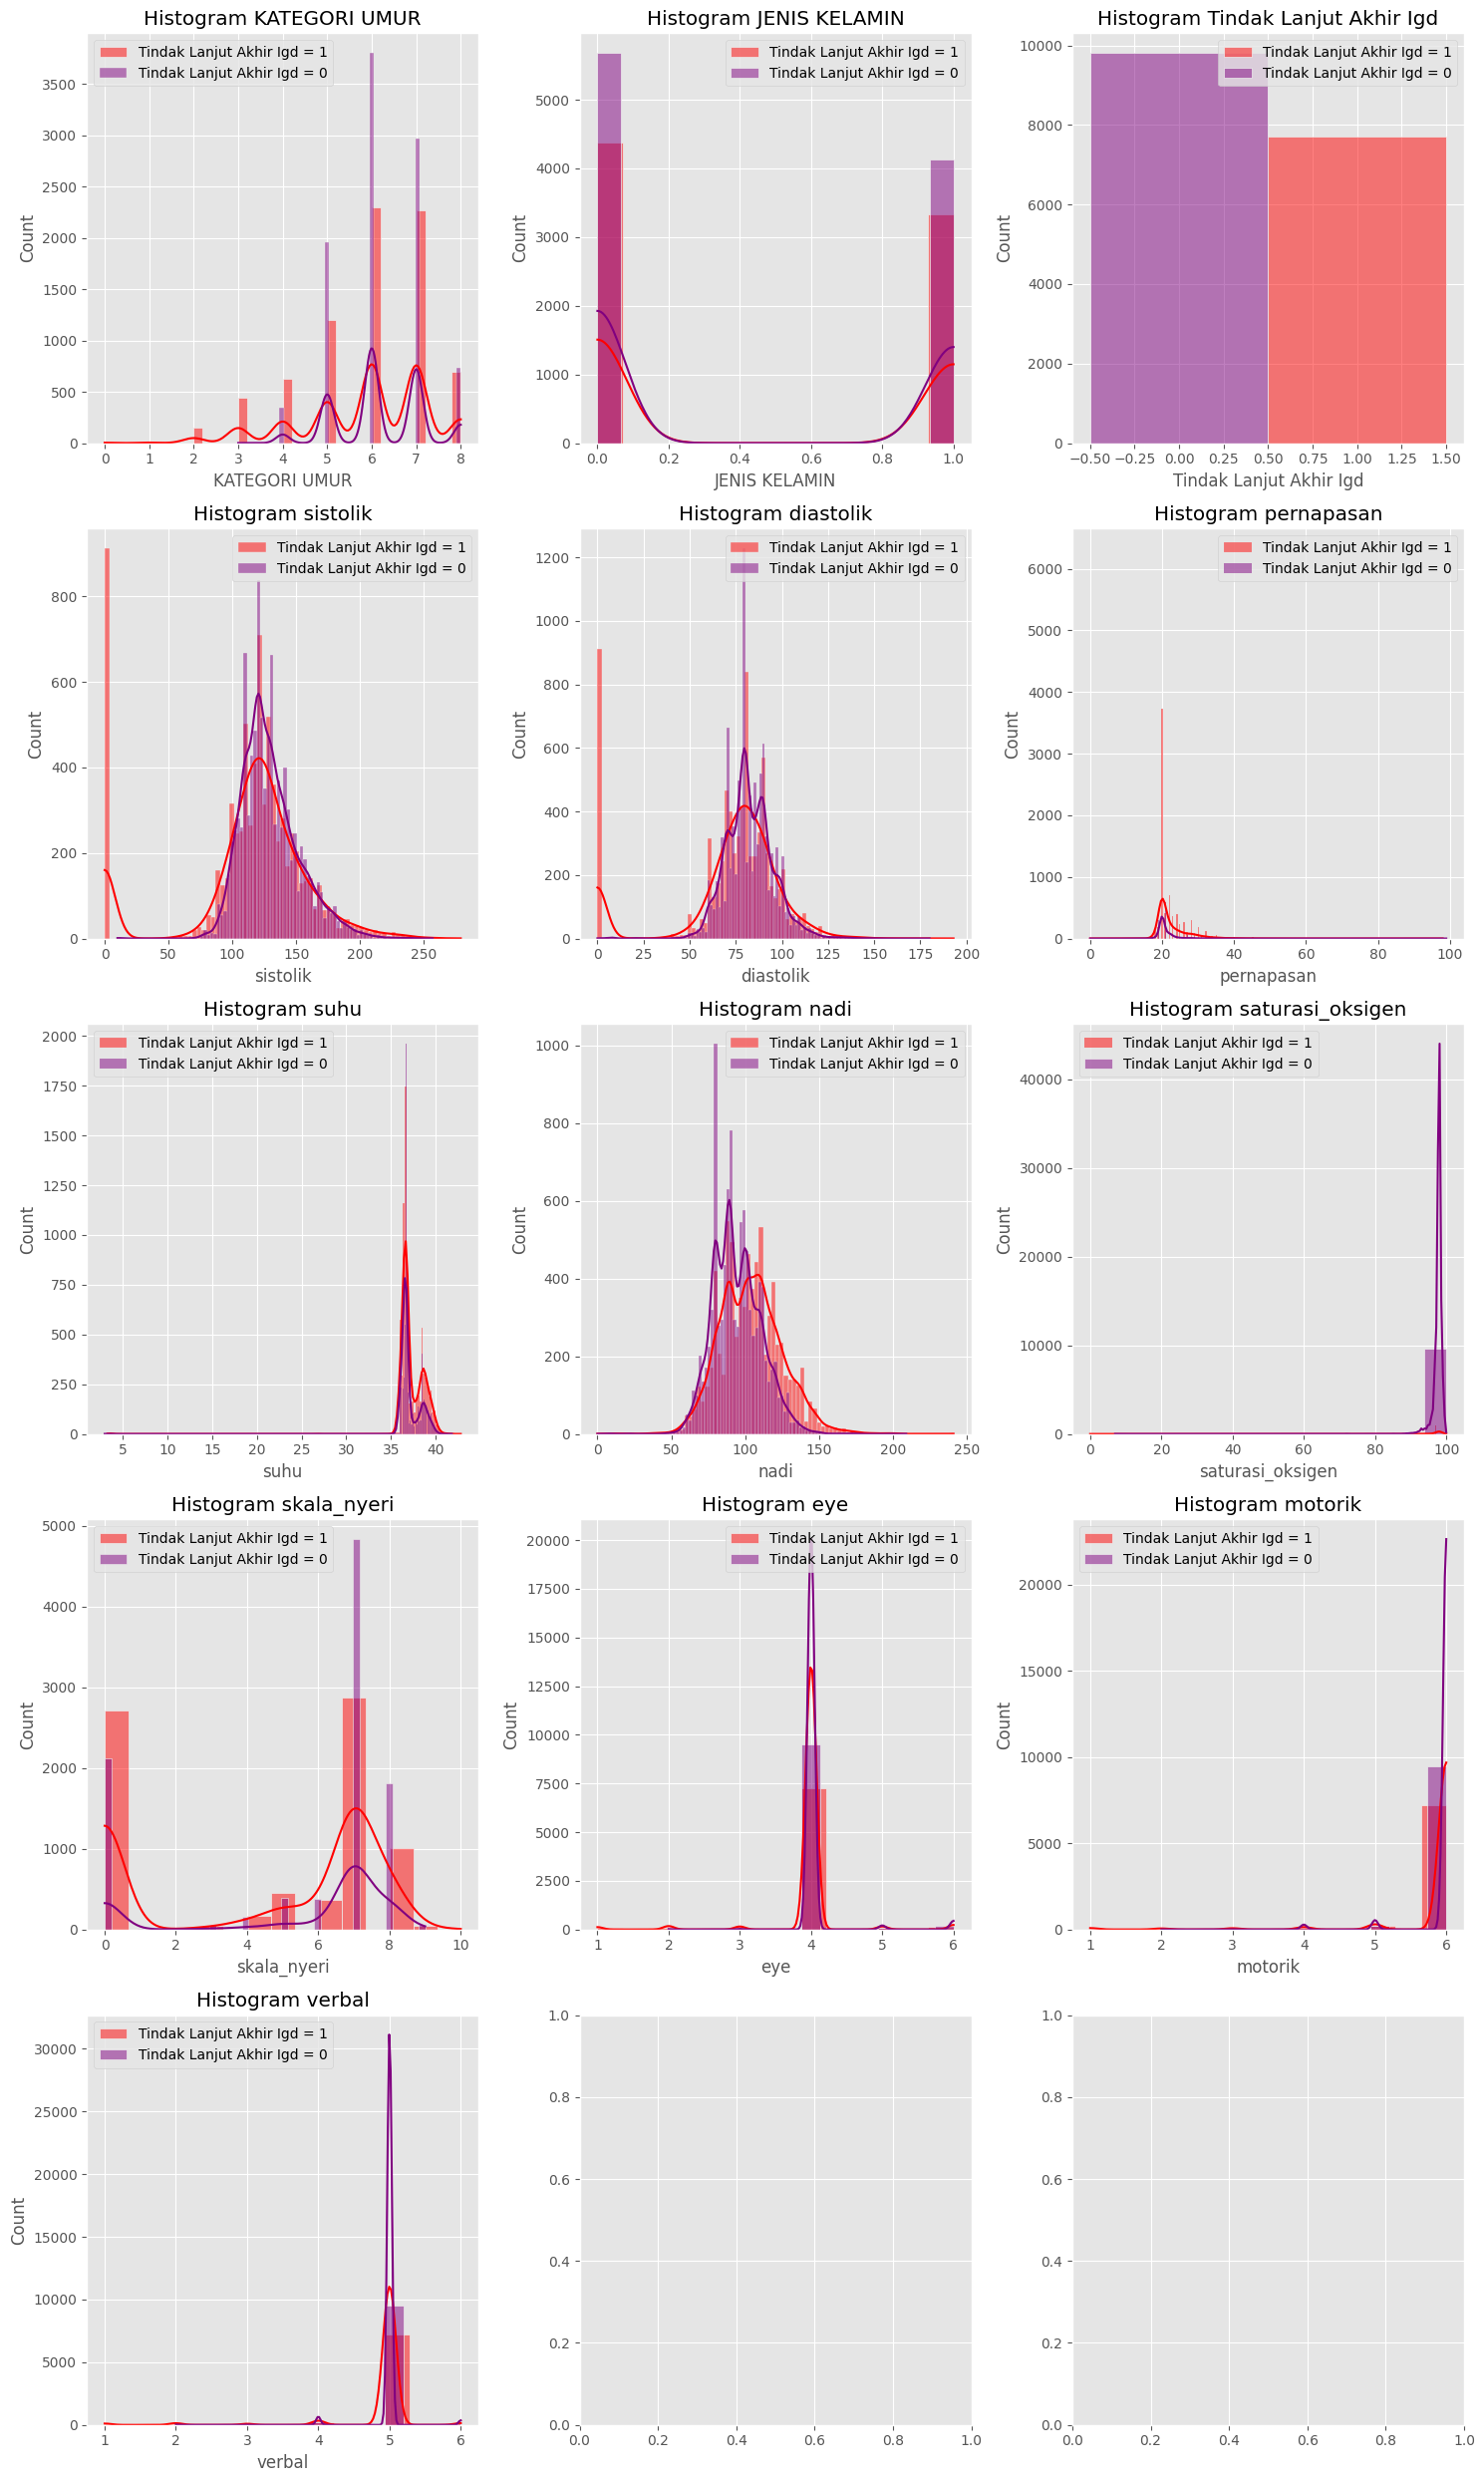

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Define colors for each category
colors = {0: 'purple', 1: 'red'}

# Numerical columns for the histogram
numeric_cols = df.select_dtypes(include=np.number).columns

# Calculate the number of rows and columns for subplots
num_cols = 3  # 3 columns per row
num_rows = math.ceil(len(numeric_cols) / num_cols)  # Calculate rows needed

# Create a figure and an array of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize

# Iterate through each numerical column and its corresponding subplot
for i, column in enumerate(numeric_cols):
    row = i // num_cols  # Calculate the row index
    col = i % num_cols  # Calculate the column index
    ax = axes[row, col]  # Get the current subplot

    # Iterate through unique values in 'Tindak Lanjut Akhir Igd'
    for value in df['Tindak Lanjut Akhir Igd'].unique():
        # Filter data for the current value
        subset = df[df['Tindak Lanjut Akhir Igd'] == value]

        # Create histogram with specified color and alpha for transparency
        sns.histplot(subset[column], kde=True, color=colors[value], 
                     alpha=0.5, label=f'Tindak Lanjut Akhir Igd = {value}', ax=ax)

    ax.set_title(f'Histogram {column}')  
    ax.legend()  

plt.tight_layout()  
plt.show()

In [182]:
# Fungsi untuk menghitung lower dan upper fence
def calculate_fences(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    return lower_fence, upper_fence

# Kolom-kolom yang akan diperiksa
columns_to_check = ['sistolik', 'diastolik', 'suhu', 'nadi', 'pernapasan', 'saturasi_oksigen']

# Filter data dengan 'Tindak Lanjut Akhir Igd' == 0
filtered_df = df[df['Tindak Lanjut Akhir Igd'] == 0]

# Ganti nilai di bawah lower fence dan di atas upper fence dengan median
for col in columns_to_check:
    lower_fence, upper_fence = calculate_fences(filtered_df[col])
    median = filtered_df[col].median()

    # Ganti nilai hanya pada filtered_df
    filtered_df.loc[(filtered_df[col] < lower_fence) | (filtered_df[col] > upper_fence), col] = median

# Gabungkan kembali filtered_df dengan data asli
df = pd.concat([filtered_df, df[df['Tindak Lanjut Akhir Igd'] != 0]])

# Reset index (opsional)
df = df.reset_index(drop=True)

In [183]:
from sklearn.preprocessing import MinMaxScaler

# List of columns to scale
columns_to_scale = ['KATEGORI UMUR', 'JENIS KELAMIN', 'sistolik', 'diastolik', 'pernapasan', 'suhu', 'nadi',
                   'saturasi_oksigen', 'skala_nyeri',
                   'eye', 'motorik', 'verbal']
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head(10)

,KATEGORI UMUR,JENIS KELAMIN,Tindak Lanjut Akhir Igd,sistolik,diastolik,pernapasan,suhu,nadi,saturasi_oksigen,skala_nyeri,eye,motorik,verbal
0,0.625,0.0,0,0.448029,0.362694,0.204082,0.840506,0.360996,0.98,0.7,0.6,1.0,0.8
1,0.875,1.0,0,0.501792,0.440415,0.204082,0.845570,0.398340,0.98,0.8,0.6,1.0,0.8
2,0.875,1.0,0,0.290323,0.310881,0.204082,0.840506,0.398340,0.98,0.7,0.6,1.0,0.8
3,0.750,1.0,0,0.519713,0.450777,0.224490,0.845570,0.298755,0.98,0.0,0.6,1.0,0.8
4,0.750,0.0,0,0.394265,0.362694,0.204082,0.845570,0.327801,0.98,0.7,0.6,1.0,0.8
5,1.000,0.0,0,0.609319,0.414508,0.204082,0.843038,0.406639,0.98,0.7,0.6,1.0,0.8
6,0.500,0.0,0,0.394265,0.362694,0.204082,0.901266,0.539419,0.98,0.7,0.6,1.0,0.8
7,0.750,0.0,0,0.397849,0.362694,0.204082,0.850633,0.390041,0.98,0.7,0.6,1.0,0.8
8,0.750,0.0,0,0.534050,0.569948,0.204082,0.845570,0.360996,0.98,0.7,0.6,1.0,0.8
9,0.625,1.0,0,0.419355,0.398964,0.204082,0.840506,0.315353,0.98,0.7,0.4,1.0,0.8


In [184]:
df.isnull().sum()

KATEGORI UMUR              0
JENIS KELAMIN              0
Tindak Lanjut Akhir Igd    0
sistolik                   0
diastolik                  0
pernapasan                 0
suhu                       0
nadi                       0
saturasi_oksigen           0
skala_nyeri                0
eye                        0
motorik                    0
verbal                     0
dtype: int64

#SPLITTING DATA

In [185]:
y = df['Tindak Lanjut Akhir Igd']
X = df.drop('Tindak Lanjut Akhir Igd', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Tanpa Imputer

In [186]:
df.shape

(17520, 13)

In [187]:
X_train.head(10)

,KATEGORI UMUR,JENIS KELAMIN,sistolik,diastolik,pernapasan,suhu,nadi,saturasi_oksigen,skala_nyeri,eye,motorik,verbal
17440,1.000,1.0,0.473118,0.404145,0.204082,0.926582,0.502075,0.98,0.7,0.6,1.0,0.8
16867,0.625,0.0,0.430108,0.414508,0.204082,0.843038,0.414938,0.98,0.7,0.6,1.0,0.8
14851,0.750,1.0,0.440860,0.393782,0.204082,0.837975,0.340249,0.98,0.7,0.6,1.0,0.8
5446,0.500,0.0,0.448029,0.331606,0.204082,0.901266,0.460581,0.98,0.0,0.6,1.0,0.8
6025,1.000,1.0,0.469534,0.466321,0.204082,0.837975,0.336100,0.98,0.0,0.6,1.0,0.8
3101,0.875,0.0,0.534050,0.497409,0.204082,0.855696,0.398340,0.98,0.7,0.6,1.0,0.8
11557,0.875,0.0,0.412186,0.383420,0.214286,0.891139,0.448133,0.98,0.0,0.6,1.0,0.8
15539,0.500,0.0,0.336918,0.326425,0.204082,0.832911,0.439834,0.99,0.7,0.6,1.0,0.8
9622,0.750,0.0,0.430108,0.445596,0.204082,0.845570,0.348548,0.98,0.7,0.8,1.0,0.6
9701,0.750,0.0,0.580645,0.559585,0.204082,0.845570,0.427386,0.98,0.8,0.6,1.0,0.8


In [188]:
y_train.head(10)

17440    1
16867    1
14851    1
5446     0
6025     0
3101     0
11557    1
15539    1
9622     0
9701     0
Name: Tindak Lanjut Akhir Igd, dtype: int64

In [189]:
y_test.head(10)

6621     0
3394     0
123      0
12074    1
15046    1
5608     0
9754     0
9976     1
2002     0
2420     0
Name: Tindak Lanjut Akhir Igd, dtype: int64

In [190]:
X_shape = X.shape
y_shape = y.shape

print("Shape of X:", X_shape)
print("Shape of y:", y_shape)

Shape of X: (17520, 12)
Shape of y: (17520,)


#PEMODELAN DAN HASIL AKHIR DENGAN MLP BACKPROPAGATION

In [191]:
# Buat model Logistic Regression
model = LogisticRegression(random_state=42)  # Anda dapat menyesuaikan hyperparameter di sini

# Latih model dengan data training
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [192]:
# Prediksi pada data testing
y_pred = model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Tampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

# Tampilkan confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7228881278538812
              precision    recall  f1-score   support

           0       0.68      0.94      0.79      1955
           1       0.85      0.45      0.59      1549

    accuracy                           0.72      3504
   macro avg       0.77      0.69      0.69      3504
weighted avg       0.76      0.72      0.70      3504

[[1835  120]
 [ 851  698]]


In [193]:
import pickle
# Nama file untuk menyimpan model
filename = 'model_logistic_regression.sav'

# Simpan model ke file
pickle.dump(model, open(filename, 'wb'))

In [194]:
# Nama file untuk menyimpan scaler
filename = 'minmax_scalerr.sav'

# Simpan scaler ke file
pickle.dump(scaler, open(filename, 'wb'))

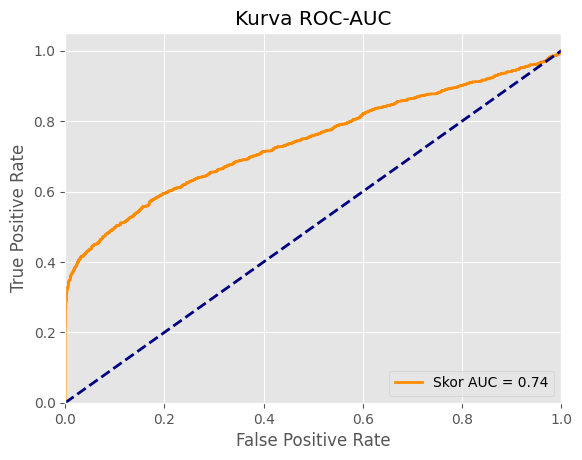

In [198]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities instead of class labels
y_pred_proba = model.predict_proba(X_test)[:, 1]  

# Use predicted probabilities for the positive class in roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  

roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Skor AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC-AUC')
plt.legend(loc="lower right")
plt.show()

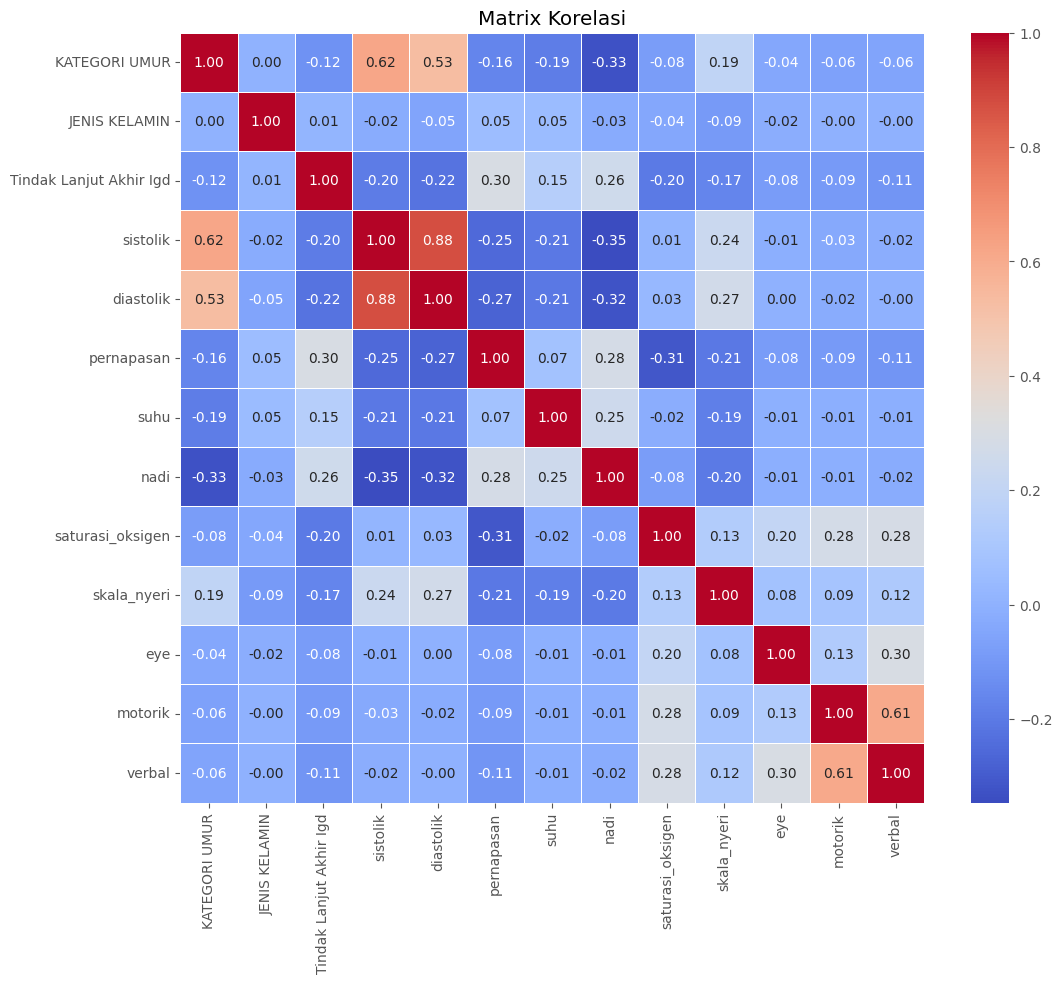

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrix Korelasi')
plt.show()

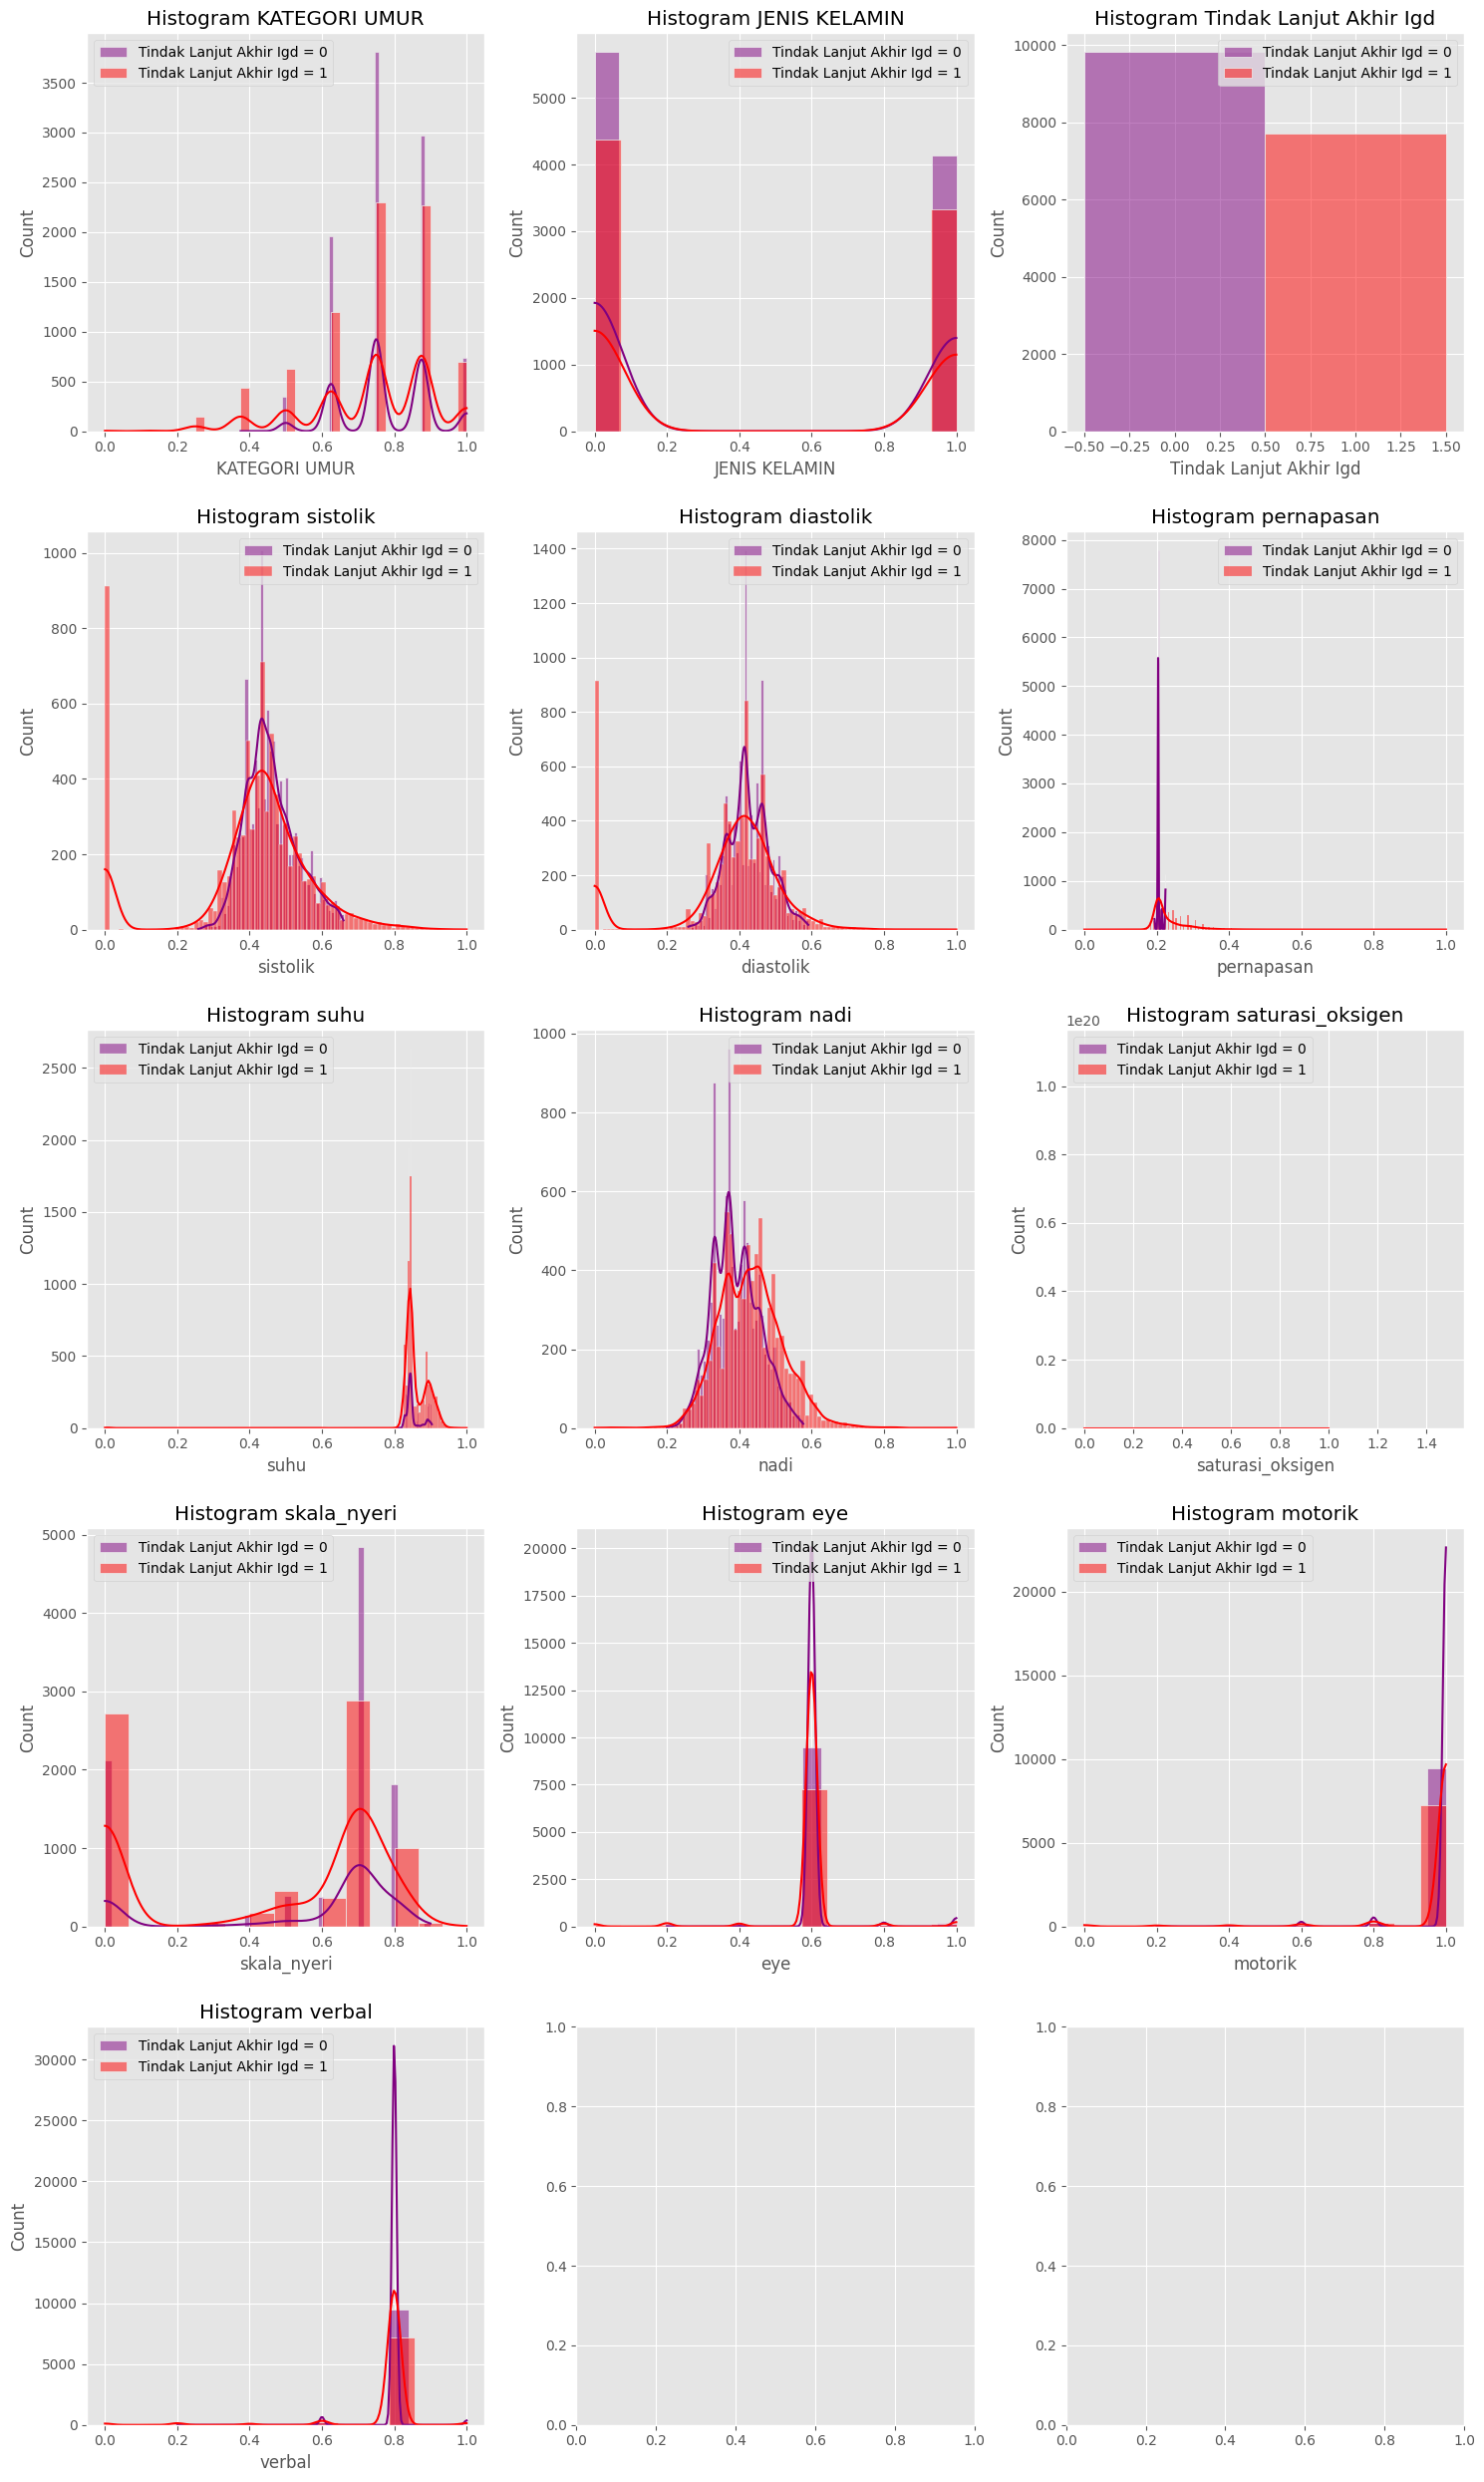

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Define colors for each category
colors = {0: 'purple', 1: 'red'}

# Numerical columns for the histogram
numeric_cols = df.select_dtypes(include=np.number).columns

# Calculate the number of rows and columns for subplots
num_cols = 3  # 3 columns per row
num_rows = math.ceil(len(numeric_cols) / num_cols)  # Calculate rows needed

# Create a figure and an array of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize

# Iterate through each numerical column and its corresponding subplot
for i, column in enumerate(numeric_cols):
    row = i // num_cols  # Calculate the row index
    col = i % num_cols  # Calculate the column index
    ax = axes[row, col]  # Get the current subplot

    # Iterate through unique values in 'Tindak Lanjut Akhir Igd'
    for value in df['Tindak Lanjut Akhir Igd'].unique():
        # Filter data for the current value
        subset = df[df['Tindak Lanjut Akhir Igd'] == value]

        # Create histogram with specified color and alpha for transparency
        sns.histplot(subset[column], kde=True, color=colors[value], 
                     alpha=0.5, label=f'Tindak Lanjut Akhir Igd = {value}', ax=ax)

    ax.set_title(f'Histogram {column}')  
    ax.legend()  

plt.tight_layout()  
plt.show()